In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium
import geopandas
import numpy as np
import os
sns.set()

## Import data into Data Frame

We're using covidtracking.com for the data.  
Make a get request and convert the json response to a list.

In [2]:
stateData = requests.get('https://covidtracking.com/api/states/daily').json()

Take a look at the data we are getting.  
stateData is a list of dictionaries containing daily information about state covid cases. 

In [3]:
#Confirm that this is a list
print(type(stateData))

#Print out the first entry from the list
print(stateData[0])

#Confirm that the first entry is a dictionary
print(type(stateData[0]))

#Look at a value by key
print(stateData[0]['date'])


<class 'list'>
{'date': 20200422, 'state': 'AK', 'positive': 335, 'negative': 11824, 'pending': None, 'hospitalizedCurrently': 39, 'hospitalizedCumulative': 36, 'inIcuCurrently': None, 'inIcuCumulative': None, 'onVentilatorCurrently': None, 'onVentilatorCumulative': None, 'recovered': 196, 'hash': '67838ce525ff91e697603d8a18cbd34dfee4bda2', 'dateChecked': '2020-04-22T20:00:00Z', 'death': 9, 'hospitalized': 36, 'total': 12159, 'totalTestResults': 12159, 'posNeg': 12159, 'fips': '02', 'deathIncrease': 0, 'hospitalizedIncrease': 0, 'negativeIncrease': 1034, 'positiveIncrease': 6, 'totalTestResultsIncrease': 1040}
<class 'dict'>
20200422


Turn the data into a Pandas Data Frame and take a look at the first few entries. 

In [4]:
originalStateDF = pd.DataFrame(stateData)
originalStateDF.head()


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200422,AK,335.0,11824.0,NaN,39.0,36.0,NaN,NaN,NaN,...,36.0,12159.0,12159.0,12159.0,02,0.0,0.0,1034.0,6.0,1040.0
1,20200422,AL,5465.0,43295.0,NaN,NaN,730.0,NaN,288.0,NaN,...,730.0,48760.0,48760.0,48760.0,01,17.0,31.0,0.0,234.0,234.0
2,20200422,AR,2276.0,27437.0,NaN,97.0,291.0,NaN,NaN,23.0,...,291.0,29713.0,29713.0,29713.0,05,-1.0,0.0,2223.0,49.0,2272.0
3,20200422,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,20200422,AZ,5459.0,51142.0,NaN,664.0,NaN,300.0,NaN,195.0,...,NaN,56601.0,56601.0,56601.0,04,21.0,0.0,1241.0,208.0,1449.0


In [5]:
# Make a new data frame where we will clean up some of the columns
stateDF = pd.DataFrame(stateData)
# Convert the date to a datetime
stateDF['date'] = pd.to_datetime(stateDF['date'].astype(str))
stateDF.head()


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-04-22,AK,335.0,11824.0,NaN,39.0,36.0,NaN,NaN,NaN,...,36.0,12159.0,12159.0,12159.0,02,0.0,0.0,1034.0,6.0,1040.0
1,2020-04-22,AL,5465.0,43295.0,NaN,NaN,730.0,NaN,288.0,NaN,...,730.0,48760.0,48760.0,48760.0,01,17.0,31.0,0.0,234.0,234.0
2,2020-04-22,AR,2276.0,27437.0,NaN,97.0,291.0,NaN,NaN,23.0,...,291.0,29713.0,29713.0,29713.0,05,-1.0,0.0,2223.0,49.0,2272.0
3,2020-04-22,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,2020-04-22,AZ,5459.0,51142.0,NaN,664.0,NaN,300.0,NaN,195.0,...,NaN,56601.0,56601.0,56601.0,04,21.0,0.0,1241.0,208.0,1449.0


In [6]:
stateDF

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-04-22,AK,335.0,11824.0,NaN,39.0,36.0,NaN,NaN,NaN,...,36.0,12159.0,12159.0,12159.0,02,0.0,0.0,1034.0,6.0,1040.0
1,2020-04-22,AL,5465.0,43295.0,NaN,NaN,730.0,NaN,288.0,NaN,...,730.0,48760.0,48760.0,48760.0,01,17.0,31.0,0.0,234.0,234.0
2,2020-04-22,AR,2276.0,27437.0,NaN,97.0,291.0,NaN,NaN,23.0,...,291.0,29713.0,29713.0,29713.0,05,-1.0,0.0,2223.0,49.0,2272.0
3,2020-04-22,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,2020-04-22,AZ,5459.0,51142.0,NaN,664.0,NaN,300.0,NaN,195.0,...,NaN,56601.0,56601.0,56601.0,04,21.0,0.0,1241.0,208.0,1449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671,2020-03-01,MI,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.0,9.0,9.0,26,NaN,NaN,NaN,NaN,NaN
2672,2020-03-01,RI,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,44,NaN,NaN,NaN,NaN,NaN
2673,2020-03-01,WA,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.0,30.0,30.0,53,3.0,0.0,0.0,12.0,12.0
2674,2020-02-29,WA,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.0,18.0,18.0,53,1.0,0.0,0.0,9.0,9.0


## Create a dataframe with most recent data (yesterday)


In [48]:
today = pd.to_datetime(datetime.date.today())
yesterday = today -  datetime.timedelta(days=1)
yesterdayDF = stateDF[stateDF['date'] == yesterday]

## Create a map color- coding yesterday's cases
(Doing it this way doesn't let us use data from the dataframe for tooltips.  But it's quick and easy.  

In [66]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'folium geojson tooltip example

r = requests.get(state_geo).json()
print(r['features'][1]['properties']['name'])


Alaska


In [80]:
bins = list(yesterdayDF['positive'].quantile([0, .25, .5, .75, 1]))
print(bins)

m = folium.Map(location=[48, -102], zoom_start=3)

positiveChoro = folium.Choropleth(
    name='Positive Tests',
    geo_data=state_geo,
    data=yesterdayDF,
    columns=['state', 'positive'],
    key_on='feature.id',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Positive Tests',
    bins=bins,
    reset=True
)

#Add the Choropleth layer to the map
positiveChoro.add_to(m)

#Add layer control
folium.LayerControl().add_to(m)

#Save the map to an html file
m.save(os.path.join('results', 'map.html'))

#Disply the map in Jupyter Lab by calling it's object
m

[0.0, 1664.25, 3914.5, 12730.75, 257216.0]


## Add a map putting everything into a geopandas dataframe

In [75]:
bins = list(yesterdayDF['positive'].quantile([0, 0.25, 0.5, 0.75, 1]))
print(bins)

m = folium.Map(location=[48, -102], zoom_start=3)

# states = folium.GeoJson(state_geo)

# tooltip = folium.GeoJson(
#     state_geo,
#     tooltip=folium.features.GeoJsonTooltip(fields=['name'])
# )


positiveChoro = folium.Choropleth(
    name='Positive Tests',
    geo_data=state_geo,
    data=yesterdayDF,
    columns=['state', 'positive'],
    key_on='feature.id',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Positive Tests',
    bins=bins,
    reset=True,
    tooltip = folium.GeoJson(
        state_geo,
        tooltip=folium.features.GeoJsonTooltip(fields=['positive'])
        )
)

# tooltip.add_to(positiveChoro.geojson)

positiveChoro.add_to(m)

folium.LayerControl().add_to(m)

#Save the map to an html file
m.save(os.path.join('results', 'map.html'))

#Disply the map in Jupyter Lab by calling it's object
m

[0.0, 1664.25, 3914.5, 12730.75, 257216.0]


In [7]:
# size is total number of entries
size = stateDF.size
# shape is (number of rows, number of columns)
shape = stateDF.shape
compSize = shape[0] * shape[1]
print(shape, size, compSize)
# row labels
print("row labels: ", stateDF.index)
print("column labels: ", stateDF.columns)
print("data types: ", stateDF.dtypes)


(2676, 25) 66900 66900
row labels:  RangeIndex(start=0, stop=2676, step=1)
column labels:  Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'hash', 'dateChecked', 'death', 'hospitalized', 'total',
       'totalTestResults', 'posNeg', 'fips', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease'],
      dtype='object')
data types:  date                        datetime64[ns]
state                               object
positive                           float64
negative                           float64
pending                            float64
hospitalizedCurrently              float64
hospitalizedCumulative             float64
inIcuCurrently                     float64
inIcuCumulative                    float64
onVentilatorCurrently        

## Exploratory data analysis

In [8]:
# make a new data frame for just values in new mexico
nmdf = stateDF.loc[stateDF['state'] == "NM"]


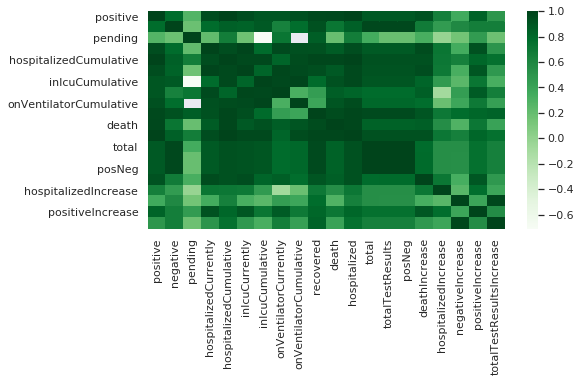

In [9]:
plt.figure(figsize=(8,4))
sns.heatmap(stateDF.corr(), cmap='Greens', annot = False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


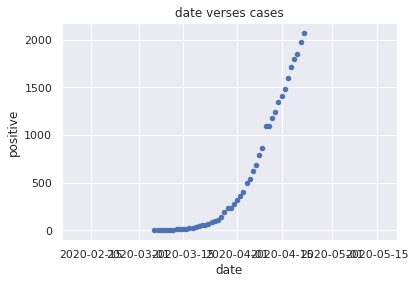

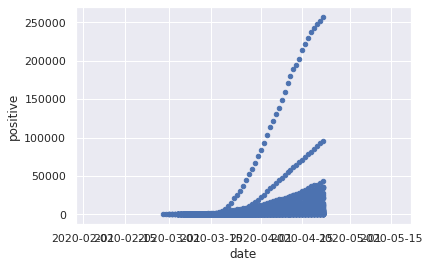

In [10]:
nmdf.plot(kind = 'scatter', x='date', y='positive', title='date verses cases')
stateDF.plot(kind = 'scatter', x='date', y='positive')

In [11]:
stateDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      2676 non-null   datetime64[ns]
 1   state                     2676 non-null   object        
 2   positive                  2661 non-null   float64       
 3   negative                  2520 non-null   float64       
 4   pending                   604 non-null    float64       
 5   hospitalizedCurrently     745 non-null    float64       
 6   hospitalizedCumulative    893 non-null    float64       
 7   inIcuCurrently            364 non-null    float64       
 8   inIcuCumulative           154 non-null    float64       
 9   onVentilatorCurrently     291 non-null    float64       
 10  onVentilatorCumulative    47 non-null     float64       
 11  recovered                 650 non-null    float64       
 12  hash                

## Compare testing and death rates

I want to explore differences between testing rates and death rates. Some states have the similar numbers of positive tests, but very different numbers of deaths.  
I want to know if the states that have a higher death to positive test ratio are doing fewer tests.  

I want to look at the ration of positive tests to total tests and the ratio of total tests to population.  

Let's see what we find...

In [30]:
stateDF.loc[stateDF['positive' == 10]]


KeyError: False

In [13]:
print(today())
#yesterday = stateDF[statdeDF[date] = ]

NameError: name 'today' is not defined

In [ ]:
datestring= "March 26"
print(pd.to_datetime(datestring))
#format('%B/%d/')